## Libraries

In [1]:
import pandas as pd
import numpy as np
from crepes import ConformalClassifier, ConformalPredictiveSystem
from crepes.extras import hinge, margin, binning, DifficultyEstimator

In [84]:
data_dir = "calibration_and_test.xlsx" #directory
df_cal=pd.read_excel(data_dir,sheet_name='conf_score_25') #cal dataset with conf=0.25
# df_cal_tp = df_cal[df_cal['TP']==1] # True Positive Predictions Only
df_cal_tp = df_cal[df_cal['pred_obj_id']!='-']

df_calibration = df_cal_tp

In [85]:
from my_functions import (softmax, 
                          softmax_df, 
                          calculate_logit, 
                          calculate_sigmoid, 
                          calculate_softmax,
                          calculate_hinge_scores,
                          calculate_p_values,
                          calculate_prediction_sets)

## Calibration stage

In [86]:
conf_score_cols = [
    'ascaris_conf_score', 
    'trichuris_conf_score', 
    'hookworm_conf_score', 
    'schistosoma_conf_score']
sigmoid_cols = [
    'ascaris_sigmoid', 
    'trichuris_sigmoid', 
    'hookworm_sigmoid', 
    'schistosoma_sigmoid']


df_calibration = calculate_sigmoid(
    df_calibration, 
    conf_score_cols, 
    'objectness_score', 
    sigmoid_cols)

C:\Users\M\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [87]:
df_subset= df_calibration[['gt_obj_id',
        'pred_obj_id', 
        'objectness_score',
        'ascaris_sigmoid',
        'trichuris_sigmoid',
        'hookworm_sigmoid',
        'schistosoma_sigmoid']]

C:\Users\M\AppData\Local\Temp\ipykernel_10696\1091683705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


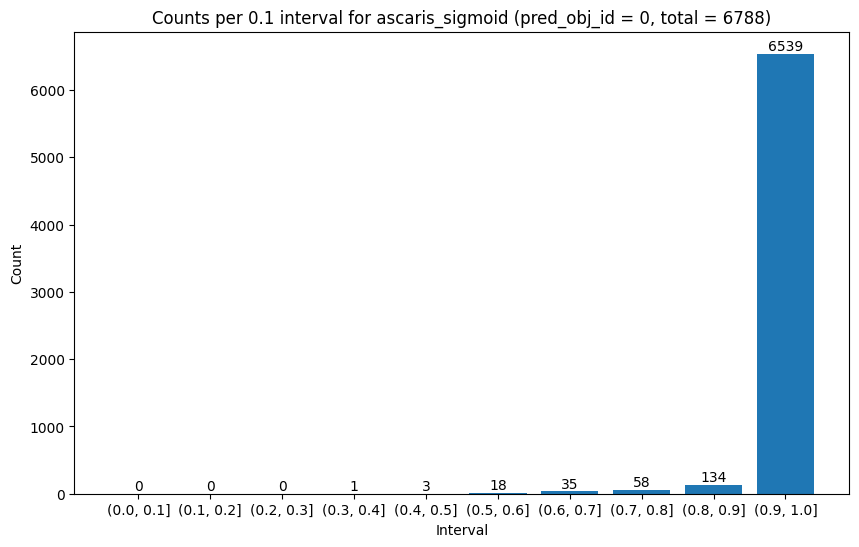

C:\Users\M\AppData\Local\Temp\ipykernel_10696\1091683705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


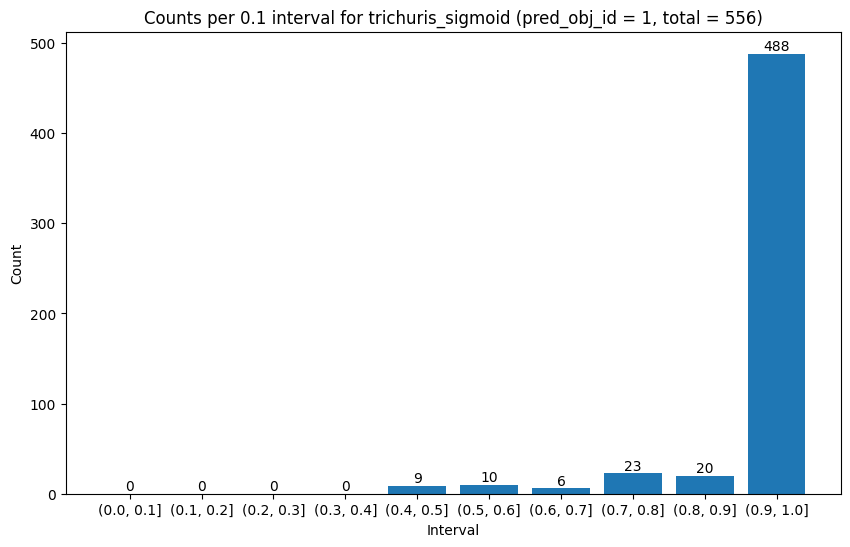

C:\Users\M\AppData\Local\Temp\ipykernel_10696\1091683705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


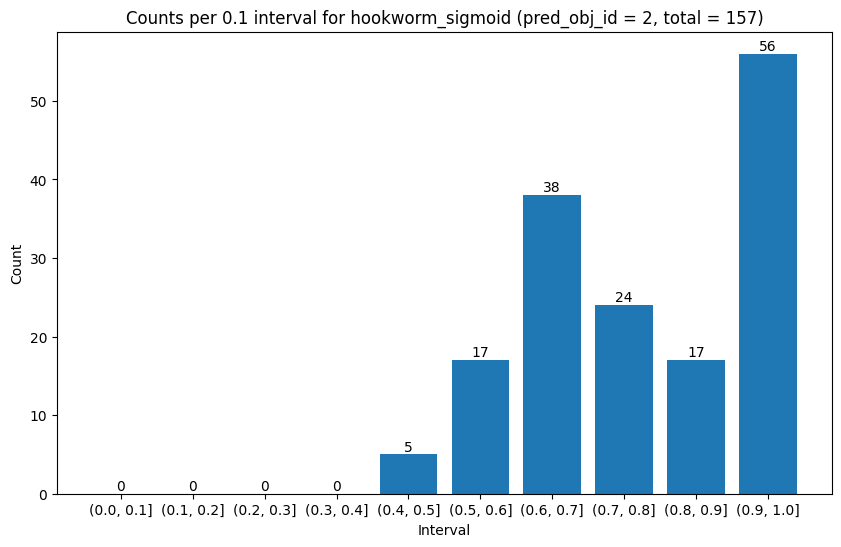

C:\Users\M\AppData\Local\Temp\ipykernel_10696\1091683705.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))


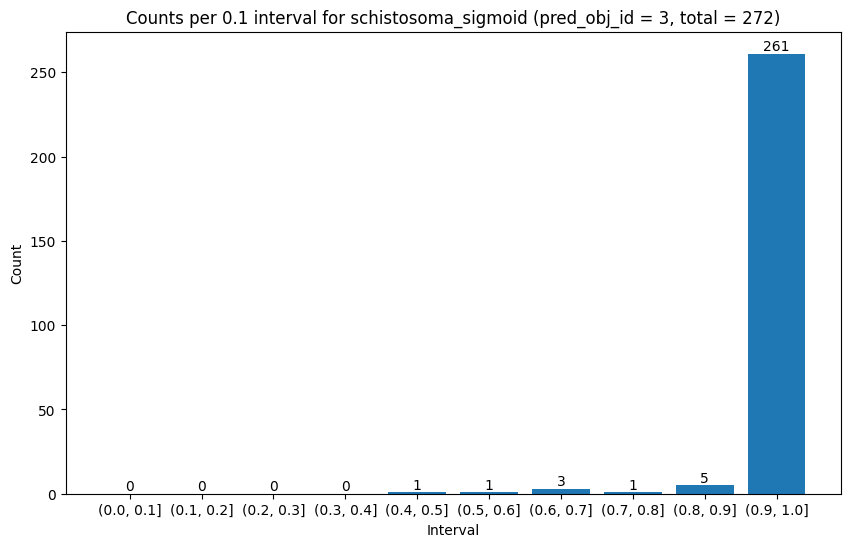

In [89]:
import matplotlib.pyplot as plt

# Define the mapping between 'pred_obj_id' and the corresponding confidence score column
mapping = {0: 'ascaris_sigmoid', 1: 'trichuris_sigmoid', 2: 'hookworm_sigmoid', 3: 'schistosoma_sigmoid'}

# Loop over the mapping
for pred_obj_id, conf_score_column in mapping.items():
    # Filter the DataFrame by 'pred_obj_id'
    df_filtered = df_subset[df_subset['pred_obj_id'] == pred_obj_id]
    
    # Categorize the data into 0.1 intervals
    df_filtered[conf_score_column] = pd.cut(df_filtered[conf_score_column], bins=np.arange(0, 1.1, 0.1))
    
    # Count the number of occurrences in each interval
    counts = df_filtered[conf_score_column].value_counts().sort_index()
    
    # Calculate the total count
    total_count = counts.sum()
    
    # Create a bar plot of the counts
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title(f'Counts per 0.1 interval for {conf_score_column} (pred_obj_id = {pred_obj_id}, total = {total_count})')
    
    # Add the counts on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
    
    plt.show()